# Quantification: group results...

In [1]:
# %% init
from IPython import get_ipython
import matplotlib.pylab as plt
import matplotlib.colors as coco
from matplotlib import dates
from datetime import datetime
import mrs.reco as reco
import mrs.fit as fit
import mrs.sim as sim
import mrs.log as log
import mrs.aliases as xxx
import mrs.paths as default_paths
import numpy as np
import pickle
get_ipython().magic("clear")
plt.close("all")

get_ipython().magic("matplotlib notebook")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.max_open_warning'] = 1000
plt.rcParams["figure.figsize"] = [8, 6]
log.setLevel(log.DEBUG)

import os
os.chdir("/home/tangir/crmbm/python/shrimp")


fdb = fit.data_db("/home/tangir/crmbm/data_fit/sc_db.pkl")


(DEBUG) Loaded backend nbAgg version unknown.
(INFO)  data_db.__init__: storage file [/home/tangir/crmbm/data_fit/sc_db.pkl] already exists!


(INFO)  data_db.get_datasets: getting datasets/pipelines using check function [<function select_func_yo at 0x7f516b3b8ca0>]...
(DEBUG) data_db.read: reading db file [/home/tangir/crmbm/data_fit/sc_db.pkl]...
(DEBUG) data_db.read: reading db file [/home/tangir/crmbm/data_fit/sc_db.pkl]...
(INFO)  metabolite_basis_set.initialize: initializing metabolite database...
(INFO)  metabolite_basis_set._read_xls_file: reading metabolite basis set from XLS file...
(DEBUG) metabolite_basis_set._write_header_file: generating metabolite and parameter aliases...
(INFO)  mrs_seq_eja_svs_slaser.initialize: initializing sequence using pyGAMMA...
(DEBUG) mrs_seq_eja_svs_slaser._init_pulses: not using real shaped pulses so nothing to do here!
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [Ala/Ala]...
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: 

[#] [Patient name]   [Dataset name]
0   314_YT_P2_MOELLE #0 sLASER 20/1 NA=128
1   338_RO_P1_MOELLE #1 sLASER 20:1 WS (TWIX)
2   329_PI_P1_MOELLE #1 sLASER 20:1 (TWIX)


(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=43.96ms)
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [Cr_CH3/Cr_CH3]...
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: simplifying the spin system
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=43.96ms)
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [Cr_CH2/Cr_CH2]...
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: simplifying the spin system
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=43.96ms)
(INFO)  mrs_seq_eja_svs_slaser._comp

(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=43.96ms)
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [PCr/PCr]...
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=43.96ms)
(INFO)  mrs_seq_eja_svs_slaser._compute_metabolite_signals: simulating MRS signal for metabolite [PC/PC_CH2]...
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: acquiring sLASER sequence: (90)-(180)-(180)-(180)-(180)...
(DEBUG) mrs_seq_eja_svs_slaser._prepare_spin_system: preparing spin system
(DEBUG) mrs_seq_eja_svs_slaser._run_sequence: done. (real TE=43.96ms)
(INFO)  mrs_seq_eja_svs_slas

<IPython.core.display.Javascript object>


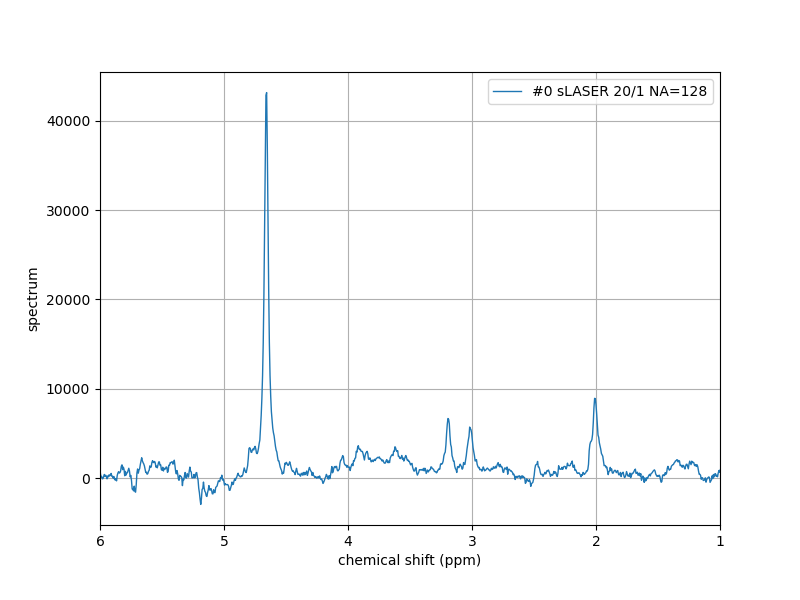

<IPython.core.display.Javascript object>


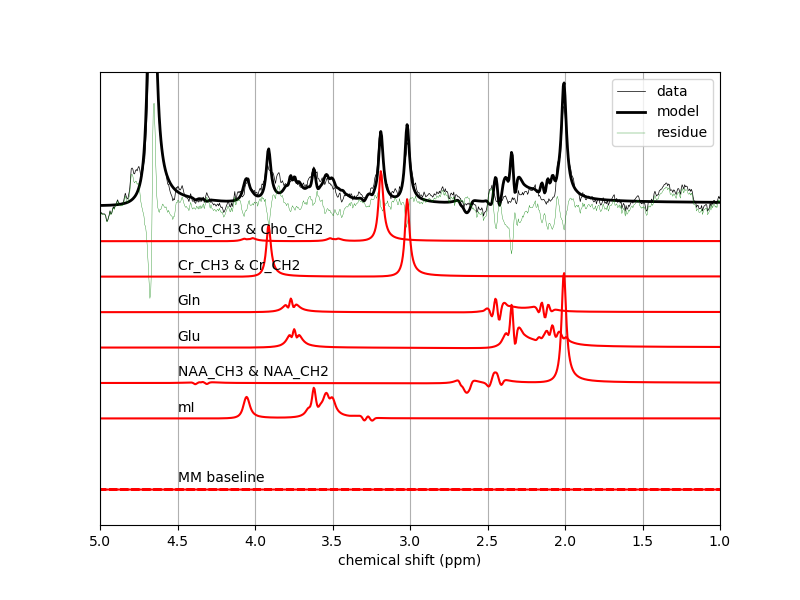

In [4]:
# %% find best fit ever omg: probably Yolanda P2
snr_ts = 30
crb_ts = 5

def select_func_yo(d, rp, fp, dp):
    kl = list(rp._analyze_results_dict[d.display_label]["snr"].keys())
    last_job = kl[-1]
    final_snr = rp._analyze_results_dict[d.display_label]["snr"][last_job]

    params_fit_CRBs_rel = dp["params_fit_CRBs_rel"]
    CRBs_ok = (params_fit_CRBs_rel[xxx.m_Cho_CH3, xxx.p_cm] < crb_ts and 
    params_fit_CRBs_rel[xxx.m_Cr_CH3, xxx.p_cm] < crb_ts and 
    params_fit_CRBs_rel[xxx.m_NAA_CH3, xxx.p_cm] < crb_ts)
    
    r = (not d.is_dicom and
         "IR" not in d.display_label and
         d.sequence.name == "eja_svs_slaser" and
         CRBs_ok and
         final_snr > snr_ts)
    return(r)

data_list, data_reco_pipeline_list, data_fit_pipeline_list, pars_list = fdb.get_datasets(select_func_yo)

data = data_list[0]
params_fit_final = sim.params(data_fit_pipeline_list[0]._meta_bs)
params_fit_final[:] = pars_list[0]["params_fit_final"]
seq = data.sequence
seq.initialize()
params_fit_final.linklock[xxx.m_Cho_CH3, xxx.p_cm] = -500
params_fit_final.linklock[xxx.m_Cho_CH2, xxx.p_cm] = 500
params_fit_final.linklock[xxx.m_Cr_CH3, xxx.p_cm] = -600
params_fit_final.linklock[xxx.m_Cr_CH2, xxx.p_cm] = 600
params_fit_final.linklock[xxx.m_NAA_CH3, xxx.p_cm] = -700
params_fit_final.linklock[xxx.m_NAA_CH2, xxx.p_cm] = 700

data.display_spectrum_1d()

# fit plot
fig, ax = plt.subplots()
fit.disp_fit(ax, data, params_fit_final, seq, True, True, [xxx.m_Cho_CH3, xxx.m_Cho_CH2, xxx.m_Cr_CH3, xxx.m_Cr_CH2, xxx.m_Gln, xxx.m_Glu, xxx.m_NAA_CH3, xxx.m_NAA_CH2, xxx.m_mI])
fig.savefig("fig_fit.svg")

In [3]:
# %% P1 : find one good scan per volunteer, best in terms of SNR
snr_ts = 5
crb_ts = 10

def select_func_yo(d, rp, fp, dp):
    kl = list(rp._analyze_results_dict[d.display_label]["snr"].keys())
    last_job = kl[-1]
    final_snr = rp._analyze_results_dict[d.display_label]["snr"][last_job]

    params_fit_CRBs_rel = dp["params_fit_CRBs_rel"]
    CRBs_ok = (params_fit_CRBs_rel[xxx.m_Cho_CH3, xxx.p_cm] < crb_ts and 
    params_fit_CRBs_rel[xxx.m_Cr_CH3, xxx.p_cm] < crb_ts and 
    params_fit_CRBs_rel[xxx.m_NAA_CH3, xxx.p_cm] < crb_ts)
    
    r = (not d.is_dicom and
         "IR" not in d.display_label and
         "P1" in d.patient_name and
         d.sequence.name == "eja_svs_slaser" and
         CRBs_ok and
         final_snr > snr_ts)
    return(r)

data_list_P1, data_reco_pipeline_list_P1, data_fit_pipeline_list_P1, pars_list_P1 = fdb.get_datasets(select_func_yo)

data_list_P1_2 = []
data_reco_pipeline_list_P1_2 = []
data_fit_pipeline_list_P1_2 = []
pars_list_P1_2 = []

ind_scanned = []
# keep best scan for each patient
for i, d in enumerate(data_list_P1):
    if(i not in ind_scanned):
        # find duplicates
        ind_patients = []
        for j, d2 in enumerate(data_list_P1):
            if(j not in ind_scanned and d.patient_name == d2.patient_name):
                ind_patients.append(j)
                ind_scanned.append(j)

        # find best snr
        best_snr = 0
        best_snr_ind = 0
        for k in ind_patients:
            dl = data_list_P1[k].display_label
            rp = data_reco_pipeline_list_P1[k]
            kl = list(rp._analyze_results_dict[dl]["snr"].keys())
            last_job = kl[-1]
            final_snr = rp._analyze_results_dict[dl]["snr"][last_job]

            if(final_snr >= best_snr):
                best_snr = final_snr
                best_snr_ind = k

        # got the highest snr scan for this patient
        data_list_P1_2.append(data_list_P1[best_snr_ind])
        data_reco_pipeline_list_P1_2.append(data_reco_pipeline_list_P1[best_snr_ind])
        data_fit_pipeline_list_P1_2.append(data_fit_pipeline_list_P1[best_snr_ind])
        pars_list_P1_2.append(pars_list_P1[best_snr_ind])

data_list_P1 = data_list_P1_2
data_reco_pipeline_list_P1 = data_reco_pipeline_list_P1_2
data_fit_pipeline_list_P1 = data_fit_pipeline_list_P1_2
pars_list_P1 = pars_list_P1_2
    
print("")
print("Filtered by SNR and sorted:")
patient_name_list = []
for d in data_list_P1:
    patient_name_list.append(d.patient_name)
patient_name_list.sort()

for p in patient_name_list:
    print(p)


(INFO)  data_db.get_datasets: getting datasets/pipelines using check function [<function select_func_yo at 0x7fe752ff74c0>]...
(DEBUG) data_db.read: reading db file [/home/tangir/crmbm/data_fit/sc_db.pkl]...
(DEBUG) data_db.read: reading db file [/home/tangir/crmbm/data_fit/sc_db.pkl]...


[#] [Patient name]        [Dataset name]
0   355_ST_P1_MOELLE      #1 sLASER TE=52ms
1   338_RO_P1_MOELLE      #1 sLASER 20:1 WS (TWIX)
2   329_PI_P1_MOELLE      #1 sLASER 20:1 (TWIX)
3   328_AF_P1_MOELLE      #1 sLASER 20:1 (TWIX)
4   319_FC_P1_MOELLE      #1 sLASER 20:1 (TWIX)
5   319_FC_P1_MOELLE      #1 sLASER 10:2 (TWIX)
6   316_AP_P1_MOELLE      #1 sLASER 20:1 (TWIX)
7   316_AP_P1_MOELLE      #3 sLASER 5:5 (TWIX)
8   314_YT_P1_MOELLE      #2 sLASER 5:5 (TWIX)
9   313_FT_P1_MOELLE      #1 sLASER 20:1 (TWIX)
10  311_SL_P1_MOELLE      #1 sLASER 20:1 (TWIX)
11  310_MG_P1_MOELLE      #1 sLASER 20:1 (TWIX)
12  307_AP_P1_MOELLE      #6 sLASER 20:1 no trig (TWIX)
13  296_YM_P1_BRAINMOELLE #3 TWIX sLASER R:N=20:1

Filtered by SNR and sorted:
296_YM_P1_BRAINMOELLE
307_AP_P1_MOELLE
310_MG_P1_MOELLE
311_SL_P1_MOELLE
313_FT_P1_MOELLE
314_YT_P1_MOELLE
316_AP_P1_MOELLE
319_FC_P1_MOELLE
328_AF_P1_MOELLE
329_PI_P1_MOELLE
338_RO_P1_MOELLE
355_ST_P1_MOELLE


<IPython.core.display.Javascript object>


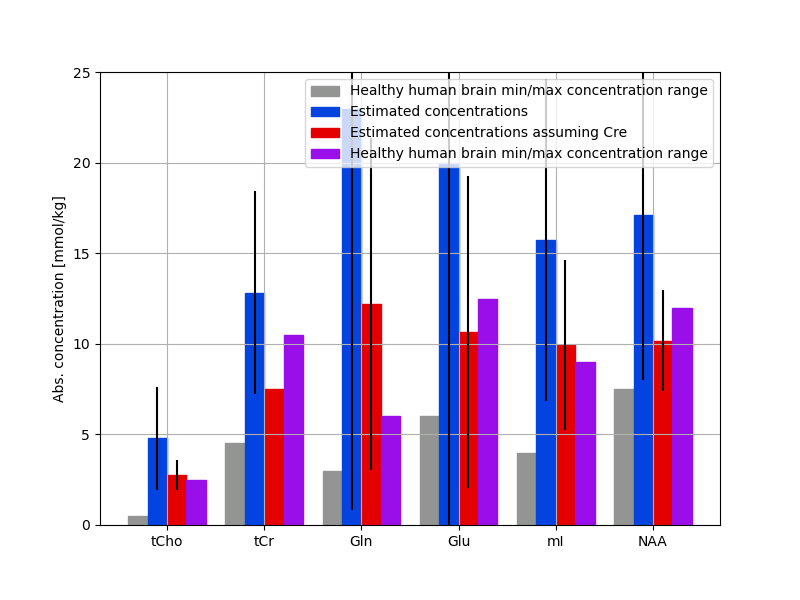

tCho/tCre = 0.37 +/- 0.11 CV = 30
Gln/tCre = 1.62 +/- 1.22 CV = 75
Glu/tCre = 1.42 +/- 1.15 CV = 81
mI/tCre = 1.32 +/- 0.62 CV = 47
NAA/tCre = 1.36 +/- 0.37 CV = 27


In [8]:
pars_abs_water_all = []
pars_abs_cre_all = []
pars_ratio_cre_all = []
for this_pars in pars_list_P1:
    pp = this_pars["params_fit_final_Ts_abs_water"]
    pars_abs_water_all.append(pp.copy())
    
    pp = this_pars["params_fit_final_Ts"]
    pp[:, xxx.p_cm] = pp[:, xxx.p_cm] * 7.5 / pp[xxx.m_Cr_CH3, xxx.p_cm]
    pars_abs_cre_all.append(pp.copy())
    
    pp = this_pars["params_fit_final_Ts"]
    pp[:, xxx.p_cm] = pp[:, xxx.p_cm] / pp[xxx.m_Cr_CH3, xxx.p_cm]
    pars_ratio_cre_all.append(pp.copy())
    
pars_abs_water_all = np.array(pars_abs_water_all)
pars_abs_cre_all = np.array(pars_abs_cre_all)
pars_ratio_cre_all = np.array(pars_ratio_cre_all)

pars_abs_water_mean = sim.params(data_fit_pipeline_list_P1[0]._meta_bs)
pars_abs_water_mean[:] = np.mean(pars_abs_water_all, axis=0)
pars_abs_water_std = np.std(pars_abs_water_all, axis=0)

pars_abs_cre_mean = sim.params(data_fit_pipeline_list_P1[0]._meta_bs)
pars_abs_cre_mean[:] = np.mean(pars_abs_cre_all, axis=0)
pars_abs_cre_std = np.std(pars_abs_cre_all, axis=0)

# human range
p_human_min = sim.params(data_fit_pipeline_list_P1[0]._meta_bs).set_default_min()
p_human_max = sim.params(data_fit_pipeline_list_P1[0]._meta_bs).set_default_max()

fig, ax = plt.subplots()
fit.disp_bargraph(ax, [p_human_min, pars_abs_water_mean, pars_abs_cre_mean, p_human_max], [p_human_min*0, pars_abs_water_std, pars_abs_cre_std, p_human_max*0], ["Healthy human brain min/max concentration range", "Estimated concentrations", "Estimated concentrations assuming Cre", "Healthy human brain min/max concentration range"], False, False, False, False, xxx.p_cm, [xxx.m_Cho_CH3, xxx.m_Cr_CH3, xxx.m_Gln, xxx.m_Glu, xxx.m_NAA_CH3, xxx.m_mI], 0.2)
ax.set_ylim([0, 25])
ax.set_xticklabels(["tCho", "tCr", "Gln", "Glu", "mI", "NAA"], rotation=0)
ax.set_ylabel("Abs. concentration [mmol/kg]")
fig.savefig("fig_group_mean.svg")

pars_ratio_cre_mean = sim.params(data_fit_pipeline_list_P1[0]._meta_bs)
pars_ratio_cre_mean[:] = np.mean(pars_ratio_cre_all, axis=0)
pars_ratio_cre_std = np.std(pars_ratio_cre_all, axis=0)

print("tCho/tCre = %.2f +/- %.2f CV = %.0f" % (pars_ratio_cre_mean[xxx.m_Cho_CH3, xxx.p_cm], pars_ratio_cre_std[xxx.m_Cho_CH3, xxx.p_cm], 100 * pars_ratio_cre_std[xxx.m_Cho_CH3, xxx.p_cm]/pars_ratio_cre_mean[xxx.m_Cho_CH3, xxx.p_cm]))
print("Gln/tCre = %.2f +/- %.2f CV = %.0f" % (pars_ratio_cre_mean[xxx.m_Gln, xxx.p_cm], pars_ratio_cre_std[xxx.m_Gln, xxx.p_cm], 100 * pars_ratio_cre_std[xxx.m_Gln, xxx.p_cm]/pars_ratio_cre_mean[xxx.m_Gln, xxx.p_cm]))
print("Glu/tCre = %.2f +/- %.2f CV = %.0f" % (pars_ratio_cre_mean[xxx.m_Glu, xxx.p_cm], pars_ratio_cre_std[xxx.m_Glu, xxx.p_cm], 100 * pars_ratio_cre_std[xxx.m_Glu, xxx.p_cm]/pars_ratio_cre_mean[xxx.m_Glu, xxx.p_cm]))
print("mI/tCre = %.2f +/- %.2f CV = %.0f" % (pars_ratio_cre_mean[xxx.m_mI, xxx.p_cm], pars_ratio_cre_std[xxx.m_mI, xxx.p_cm], 100 * pars_ratio_cre_std[xxx.m_mI, xxx.p_cm]/pars_ratio_cre_mean[xxx.m_mI, xxx.p_cm]))
print("NAA/tCre = %.2f +/- %.2f CV = %.0f" % (pars_ratio_cre_mean[xxx.m_NAA_CH3, xxx.p_cm], pars_ratio_cre_std[xxx.m_NAA_CH3, xxx.p_cm], 100 * pars_ratio_cre_std[xxx.m_NAA_CH3, xxx.p_cm]/pars_ratio_cre_mean[xxx.m_NAA_CH3, xxx.p_cm]))


In [5]:
# %% P2 : find one good scan per volunteer, best in terms of SNR
snr_ts = 5
crb_ts = 10

def select_func_yo(d, rp, fp, dp):
    kl = list(rp._analyze_results_dict[d.display_label]["snr"].keys())
    last_job = kl[-1]
    final_snr = rp._analyze_results_dict[d.display_label]["snr"][last_job]

    params_fit_CRBs_rel = dp["params_fit_CRBs_rel"]
    CRBs_ok = (params_fit_CRBs_rel[xxx.m_Cho_CH3, xxx.p_cm] < crb_ts and 
    params_fit_CRBs_rel[xxx.m_Cr_CH3, xxx.p_cm] < crb_ts and 
    params_fit_CRBs_rel[xxx.m_NAA_CH3, xxx.p_cm] < crb_ts)
    
    r = (not d.is_dicom and
         "IR" not in d.display_label and
         "P2" in d.patient_name and
         d.sequence.name == "eja_svs_slaser" and
         CRBs_ok and
         final_snr > snr_ts)
    return(r)

data_list_P2, data_reco_pipeline_list_P2, data_fit_pipeline_list_P2, pars_list_P2 = fdb.get_datasets(select_func_yo)

data_list_P2_2 = []
data_reco_pipeline_list_P2_2 = []
data_fit_pipeline_list_P2_2 = []
pars_list_P2_2 = []

ind_scanned = []
# keep best scan for each patient
for i, d in enumerate(data_list_P2):
    if(i not in ind_scanned):
        # find duplicates
        ind_patients = []
        for j, d2 in enumerate(data_list_P2):
            if(j not in ind_scanned and d.patient_name == d2.patient_name):
                ind_patients.append(j)
                ind_scanned.append(j)

        # find best snr
        best_snr = 0
        best_snr_ind = 0
        for k in ind_patients:
            dl = data_list_P2[k].display_label
            rp = data_reco_pipeline_list_P2[k]
            kl = list(rp._analyze_results_dict[dl]["snr"].keys())
            last_job = kl[-1]
            final_snr = rp._analyze_results_dict[dl]["snr"][last_job]

            if(final_snr >= best_snr):
                best_snr = final_snr
                best_snr_ind = k

        # got the highest snr scan for this patient
        data_list_P2_2.append(data_list_P2[best_snr_ind])
        data_reco_pipeline_list_P2_2.append(data_reco_pipeline_list_P2[best_snr_ind])
        data_fit_pipeline_list_P2_2.append(data_fit_pipeline_list_P2[best_snr_ind])
        pars_list_P2_2.append(pars_list_P2[best_snr_ind])

data_list_P2 = data_list_P2_2
data_reco_pipeline_list_P2 = data_reco_pipeline_list_P2_2
data_fit_pipeline_list_P2 = data_fit_pipeline_list_P2_2
pars_list_P2 = pars_list_P2_2

print("")
print("Filtered by SNR and sorted:")
patient_name_list = []
for d in data_list_P2:
    patient_name_list.append(d.patient_name)
patient_name_list.sort()

for p in patient_name_list:
    print(p)

(INFO)  data_db.get_datasets: getting datasets/pipelines using check function [<function select_func_yo at 0x7fe727983670>]...
(DEBUG) data_db.read: reading db file [/home/tangir/crmbm/data_fit/sc_db.pkl]...
(DEBUG) data_db.read: reading db file [/home/tangir/crmbm/data_fit/sc_db.pkl]...


[#] [Patient name]   [Dataset name]
0   314_YT_P2_MOELLE #0 sLASER 20/1 NA=128
1   333_SC_P2_MOELLE #1 sLASER 20/1
2   313_FT_P2_MOELLE #1 sLASER 20/1
3   319_FC_P2_MOELLE #1 sLASER 10/2 NA=64 trig
4   336_NB_P2_MOELLE #0 sLASER 20/1 NA=128 trig
5   336_NB_P2_MOELLE #1 sLASER 20/1 NA=64 notrig
6   336_NB_P2_MOELLE #2 sLASER 10/2 NA=64 notrig
7   311_SL_P2_MOELLE #0 sLASER 20/1 NA=128 trig
8   311_SL_P2_MOELLE #0 sLASER 20/1 NA=128 notrig
9   304_KA_P2_MOELLE #1 1st try (30-40Hz water LW)
10  304_KA_P2_MOELLE #1 2nd try (25Hz water LW)
11  300_PM_P2_MOELLE #1 sLASER 20:1 (REF with OVS)

Filtered by SNR and sorted:
300_PM_P2_MOELLE
304_KA_P2_MOELLE
311_SL_P2_MOELLE
313_FT_P2_MOELLE
314_YT_P2_MOELLE
319_FC_P2_MOELLE
333_SC_P2_MOELLE
336_NB_P2_MOELLE


In [6]:
# merge with previous P1s
data_list_P1P2 = data_list_P1 + data_list_P2
data_reco_pipeline_list_P1P2 = data_reco_pipeline_list_P1 + data_reco_pipeline_list_P2
data_fit_pipeline_list_P1P2 = data_fit_pipeline_list_P1 + data_fit_pipeline_list_P2
pars_list_P1P2 = pars_list_P1 + pars_list_P2

# sort according to number
patient_name_list = []
for d in data_list_P1P2:
    patient_name_list.append(d.patient_name)
    
patient_name_list = np.array(patient_name_list)
inds = np.argsort(patient_name_list)

data_list_P1P2_sorted = []
data_reco_pipeline_list_P1P2_sorted = []
data_fit_pipeline_list_P1P2_sorted = []
pars_list_P1P2_sorted = []
for ii in inds:
    data_list_P1P2_sorted.append(data_list_P1P2[ii])
    data_reco_pipeline_list_P1P2_sorted.append(data_reco_pipeline_list_P1P2[ii])
    data_fit_pipeline_list_P1P2_sorted.append(data_fit_pipeline_list_P1P2[ii])
    pars_list_P1P2_sorted.append(pars_list_P1P2[ii])

patient_names = []
for d in data_list_P1P2_sorted:
    patient_names.append(d.patient_name)
    print(d.patient_name)


296_YM_P1_BRAINMOELLE
300_PM_P2_MOELLE
304_KA_P2_MOELLE
307_AP_P1_MOELLE
310_MG_P1_MOELLE
311_SL_P1_MOELLE
311_SL_P2_MOELLE
313_FT_P1_MOELLE
313_FT_P2_MOELLE
314_YT_P1_MOELLE
314_YT_P2_MOELLE
316_AP_P1_MOELLE
319_FC_P1_MOELLE
319_FC_P2_MOELLE
328_AF_P1_MOELLE
329_PI_P1_MOELLE
333_SC_P2_MOELLE
336_NB_P2_MOELLE
338_RO_P1_MOELLE
355_ST_P1_MOELLE


<ipython-input-7-af43f42f9902>:26: RuntimeWarning: invalid value encountered in true_divide
  pp4[:, xxx.p_cm] = this_pars["params_fit_final_Ts_abs_water"][:, xxx.p_cm]/this_pars["params_fit_final_Ts_abs_water"][xxx.m_Cr_CH3, xxx.p_cm] * (this_pars["params_fit_CRBs_abs"][:, xxx.p_cm]/this_pars["params_fit_final_Ts_abs_water"][:, xxx.p_cm] + this_pars["params_fit_CRBs_abs"][xxx.m_Cr_CH3, xxx.p_cm]/this_pars["params_fit_final_Ts_abs_water"][xxx.m_Cr_CH3, xxx.p_cm])


<IPython.core.display.Javascript object>


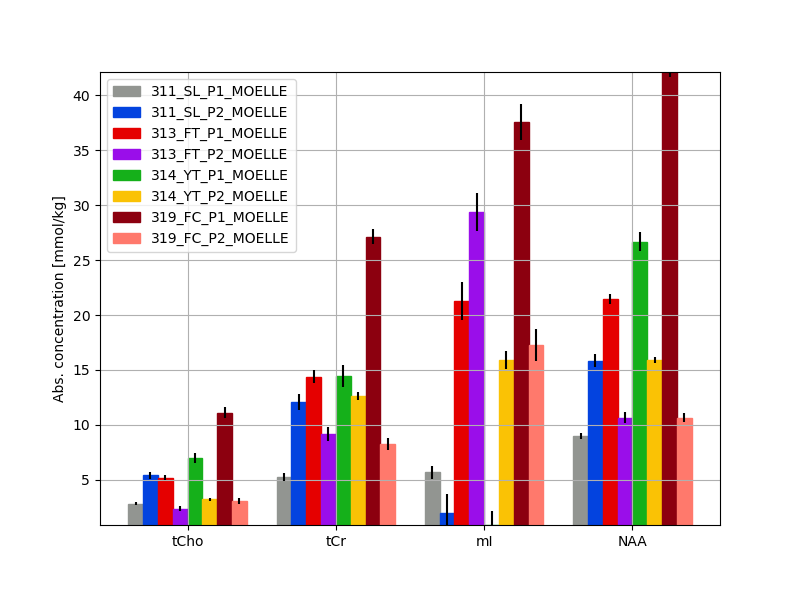

<IPython.core.display.Javascript object>


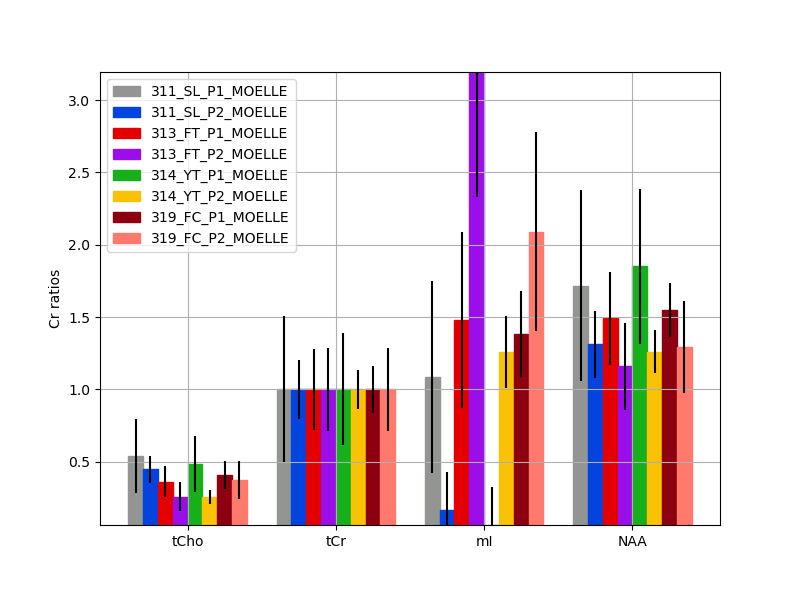

In [7]:
pars_abs_water_all = []
pars_abs_cre_all = []
pars_crb_water_all = []
pars_crb_cre_all = []
caption_list = []
P1P2s_list = [300, 304, 311, 313, 314, 319, 333, 336]
P1P2s_list = [311, 313, 314, 319]  # to set manually....

for this_pars, this_pn in zip(pars_list_P1P2_sorted, patient_names):
    this_patient_number = int(this_pn[0:3])
    if(this_patient_number in P1P2s_list):
        pp = sim.params(data_fit_pipeline_list_P1P2_sorted[0]._meta_bs)
        pp[:] = this_pars["params_fit_final_Ts_abs_water"]
        pars_abs_water_all.append(pp)
        # crb
        pp2 = sim.params(data_fit_pipeline_list_P1P2_sorted[0]._meta_bs)
        pp2[:] = this_pars["params_fit_final_Ts_abs_water"] * this_pars["params_fit_CRBs_rel"] / 100.0
        pars_crb_water_all.append(pp2)
        
        pp3 = sim.params(data_fit_pipeline_list_P1P2_sorted[0]._meta_bs)
        pp3[:] = this_pars["params_fit_final_Ts_abs_water"]
        pp3[:, xxx.p_cm] = pp3[:, xxx.p_cm] / pp3[xxx.m_Cr_CH3, xxx.p_cm]
        pars_abs_cre_all.append(pp3)
        # crb
        pp4 = sim.params(data_fit_pipeline_list_P1P2_sorted[0]._meta_bs)
        pp4[:, xxx.p_cm] = this_pars["params_fit_final_Ts_abs_water"][:, xxx.p_cm]/this_pars["params_fit_final_Ts_abs_water"][xxx.m_Cr_CH3, xxx.p_cm] * (this_pars["params_fit_CRBs_abs"][:, xxx.p_cm]/this_pars["params_fit_final_Ts_abs_water"][:, xxx.p_cm] + this_pars["params_fit_CRBs_abs"][xxx.m_Cr_CH3, xxx.p_cm]/this_pars["params_fit_final_Ts_abs_water"][xxx.m_Cr_CH3, xxx.p_cm])
        pars_crb_cre_all.append(pp4)

        caption_list.append(this_pn)

fig, ax = plt.subplots()
fit.disp_bargraph(ax, pars_abs_water_all, pars_crb_water_all, caption_list, False, False, False, False, xxx.p_cm, [xxx.m_Cho_CH3, xxx.m_Cr_CH3, xxx.m_NAA_CH3, xxx.m_mI], 0.1)
ax.set_xticklabels(["tCho", "tCr", "mI", "NAA"], rotation=0)
ax.set_ylabel("Abs. concentration [mmol/kg]")
fig.savefig("fig_group_repro_cm_abs.svg")

fig, ax = plt.subplots()
fit.disp_bargraph(ax, pars_abs_cre_all, pars_crb_cre_all, caption_list, False, False, False, False, xxx.p_cm, [xxx.m_Cho_CH3, xxx.m_Cr_CH3, xxx.m_NAA_CH3, xxx.m_mI], 0.1)
ax.set_xticklabels(["tCho", "tCr", "mI", "NAA"], rotation=0)
ax.set_ylabel("Cr ratios")
fig.savefig("fig_group_repro_ratios.svg")
